# Introduction to Scikit-Learn (sklearn)

This notebook introduces the most useful function of the Scikit-Learn library

What will be covered:
    
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model and use it to make predictions
4. Evaluate the model
5. Improve the model
6. save and load the trained model
7. Putting it all together

In [1]:
import numpy as gooch
x = gooch.arange(5)
x_mean = gooch.mean(x)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## An end-to-end Scikit Learn Workflow

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)
 
# Create y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the mode to the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
y_test

208    0
174    0
110    1
184    0
123    1
      ..
302    0
277    0
151    1
100    1
82     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training and testing data
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.7704918032786885

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        22
           1       0.80      0.85      0.83        39

    accuracy                           0.77        61
   macro avg       0.75      0.74      0.75        61
weighted avg       0.77      0.77      0.77        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[14,  8],
       [ 6, 33]], dtype=int64)

In [14]:
accuracy_score(y_test,y_preds)

0.7704918032786885

In [15]:
# 5. Improve a model
#try different amount of n_estimators

scores_history = []
np.random.seed(42)
for i in range(10,100,1):
    #print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    #print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100} percent")
    scores_history.append(clf.score(X_test,y_test)*100)

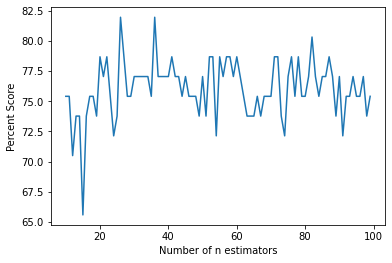

In [16]:
# see graph of # of n estimators vs score history
plt.plot(np.arange(10,100,1),np.array(scores_history))
plt.xlabel("Number of n estimators");
plt.ylabel("Percent Score");

In [17]:
# 6. save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test,y_test)

0.7540983606557377

In [19]:
import sklearn
print(sklearn.__version__)

1.0.2


## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (X and y)
2. Filling (also called imputing) or disregarding mssing values
3. Converting non-numerical to numerical values (feature encoding/one hot encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
len(heart_disease), 242+61

(303, 303)

### 1.1 Make sure its all numerical

In [26]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [27]:
car_sales.dtypes,car_sales.shape

(Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object,
 (1000, 5))

In [28]:
# split the data into X and y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [29]:

#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [30]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [31]:
categorical_columns = ["Make","Colour","Doors"]
car_sales_encoded = pd.get_dummies(car_sales,columns=categorical_columns)
car_sales_encoded

,Odometer (KM),Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,15323,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,19943,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,28343,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,13434,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,14043,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820,32042,0,0,0,1,1,0,0,0,0,0,1,0
996,155144,5716,0,0,1,0,0,0,0,0,1,1,0,0
997,66604,31570,0,0,1,0,0,1,0,0,0,0,1,0
998,215883,4001,0,1,0,0,0,0,0,0,1,0,1,0


In [32]:
X = car_sales_encoded.drop("Price",axis=1)
X.head()

,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,0,0,1,0,0,1,0,0,0,1,0,0


In [33]:
y = car_sales_encoded["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [34]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
model.score(X_test,y_test)

0.32497573093668863

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [36]:
# import car sales missing data
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [38]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [39]:
# See how many missing values there are
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
# create x and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

#### Option 1: fill missing data with Pandas

In [41]:
# fill the Make
car_sales_missing["Make"].fillna("missing",inplace=True)

# fill the colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# fill the Doors columns
car_sales_missing["Doors"].fillna(4,inplace= True)

#check the new dataframe
car_sales_missing.isna().sum() # it is ok we have price data points that are NaN because price is what we are trying to predict. we will get rid of those rows that have NaN in price

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
car_sales_missing.shape

(950, 5)

In [44]:
# create x and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [45]:
categorical_columns = ["Make","Colour","Doors"]
car_sales_encoded_missing = pd.get_dummies(car_sales_missing,columns=categorical_columns)
car_sales_encoded_missing

,Odometer (KM),Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing,Doors_3.0,Doors_4.0,Doors_5.0
0,35431.0,15323.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,192714.0,19943.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,84714.0,28343.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,154365.0,13434.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,181577.0,14043.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820.0,32042.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
996,155144.0,5716.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
997,66604.0,31570.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
998,215883.0,4001.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Option 2: fill missing values with scikit-learn

In [46]:
car_sales_missing_new = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing_new

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
car_sales_missing_new.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
car_sales_missing_new.dropna(subset=["Price"],inplace=True)
car_sales_missing_new.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split the data into X and y
X = car_sales_missing_new.drop("Price",axis=1)
y = car_sales_missing_new["Price"]

In [50]:
# fill missing values with scikitlearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
    
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make","Colour","Doors","Odometer (KM)"])

In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [55]:
#categorical_columns = ["Make","Colour","Doors"]
#car_sales_encoded_filled = pd.get_dummies(car_sales_filled,columns=categorical_columns)
#car_sales_encoded_filled

In [56]:
# Now we've got our data as number and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(transformed_X,
                                            y,
                                            test_size=0.2)

model=RandomForestRegressor()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
    * sometimes youll see 'clf' (short for classififer) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If youre working on a machine learning problem and looking to use sklearn and not sure what model to use, refer to the machine learning map:
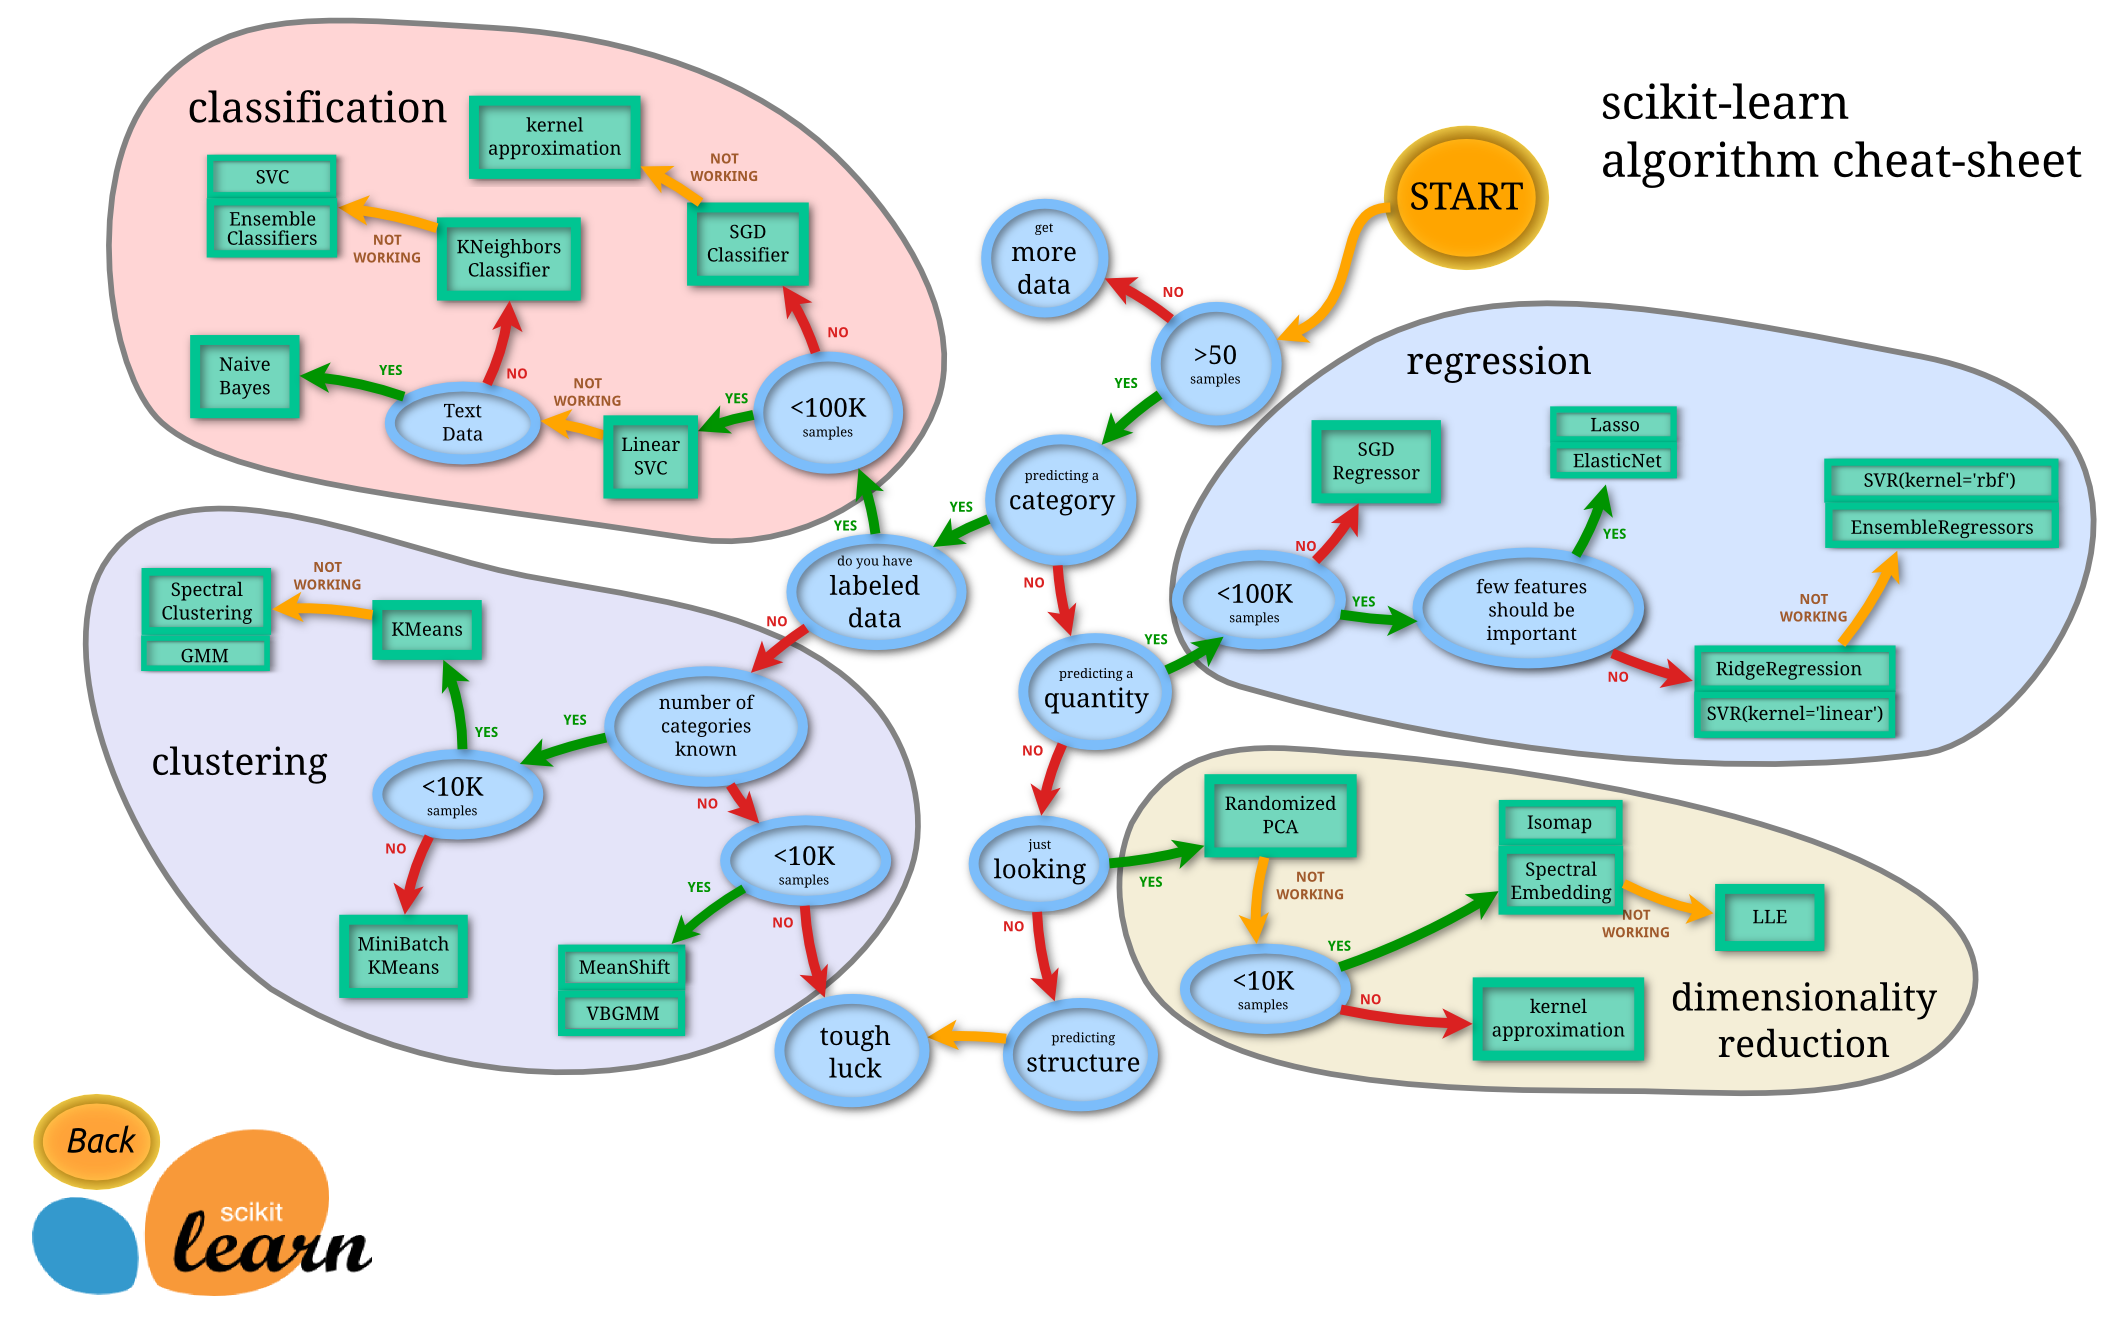

### 2.1 Picking a machine learning model for a regession problem

Lets use the california housing dataset:https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [57]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [58]:
housing_df = pd.DataFrame(housing["data"],
                         columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
housing_df["MedHouseVal"] = housing["target"]

In [60]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [61]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [62]:
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
# Import algorithm

# setup random seed
np.random.seed(42)

# create data
X = housing_df.drop("target",axis=1)
y = housing_df["target"] #median house price in 100,000's

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

# create a model on the training set (refer to scikit learn algorithm map)
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(Xtrain,ytrain)

#check the performance on the test set
model.score(Xtest,ytest) #this is our R^2 value

0.5758549611440126

The above score is only 0.57. We can try to improve this by tuning the hyperparameters and/or change the model we are using

See below for other model predictors used

In [64]:
# lets try another model to try an improve our score
from sklearn.linear_model import Lasso
model = Lasso()

# create a model on the training set (refer to scikit learn algorithm map)
model.fit(Xtrain,ytrain)

#check the performance on the test set
model.score(Xtest,ytest) #this is our R^2 value

0.2841671821008396

In [65]:
# Import the RandomForestRegressor model class from the ensemble module

from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

model = RandomForestRegressor()
model.fit(Xtrain,ytrain)

model.score(Xtest,ytest)

0.8051230593157366

## 2.2 Picking a machine learning model for a classification problem

In [66]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [67]:
heart_disease.shape

(303, 14)

Lets try the linear lvm for classification

In [68]:
from sklearn.svm import LinearSVC

np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)
clf = LinearSVC(max_iter=1000)
clf.fit(Xtrain,ytrain)

clf.score(Xtest,ytest)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [69]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [70]:
# lets try a randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(Xtrain,ytrain)

clf.score(Xtest,ytest)

0.8688524590163934

Note: 
- If we have structured data use ensemble methods
- If we have unstructured data use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 fitting the data to the model

In [71]:
# lets try a randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(Xtrain,ytrain)

clf.score(Xtest,ytest)

0.8688524590163934

### 3.2 make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [72]:
Xtest.shape

(61, 13)

In [73]:
# use a trained model to make predictions
clf.predict(Xtest)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
np.array(ytest)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
# compare the predictions to the truth labels to evaluate the model
ypreds = clf.predict(Xtest)
np.mean(ypreds == ytest),clf.score(Xtest,ytest)

(0.8688524590163934, 0.8688524590163934)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypreds)

0.8688524590163934

make predictions with predict_proba()

In [77]:
# predict_proba returns the estimates for all classes  of a classification label
clf.predict_proba(Xtest)[:5]

array([[0.914, 0.086],
       [0.424, 0.576],
       [0.486, 0.514],
       [0.877, 0.123],
       [0.229, 0.771]])

In [78]:
# predict predicts the class it is in
clf.predict(Xtest)[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [79]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

predict() can also be used for regression models

In [80]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split the data to train/test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

# create the model
model = RandomForestRegressor(n_estimators=10)

#fit the model to the data
model.fit(Xtrain,ytrain)

# make predictions
ypred = model.predict(Xtest)

In [82]:
ypred

array([0.5015  , 0.71    , 4.988908, ..., 4.664608, 0.7111  , 1.693   ])

In [83]:
np.array(ytest)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f" MSE:{mean_squared_error(np.array(ytest),ypred)}, MAE:{mean_absolute_error(np.array(ytest),ypred)}")

 MSE:0.2791276498198556, MAE:0.3459883100775194


## 4. evaluating a machine learning model

3 ways to evaluate a scikit-learn model

1) the built in score() method

2) the scoring parameter

3) problem specific metric functions

### 4.1 evaluating a model with the score method

In [85]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#create train/test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

#create the model
clf = RandomForestClassifier()

#fit the model
clf.fit(Xtrain,ytrain)

#score the model
clf.score(Xtest,ytest)

0.8524590163934426

lets use the score on our regression problem

In [87]:
# Import the RandomForestRegressor model class from the ensemble module

from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# create train/test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)

model.fit(Xtrain,ytrain)

model.score(Xtest,ytest)

0.8065734772187598

### 4.2 evaluating a model using the scoring parameter

In [88]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#create train/test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

#create the model
clf = RandomForestClassifier()

#fit the model
clf.fit(Xtrain,ytrain)

RandomForestClassifier()

In [89]:
#score the model
clf.score(Xtest,ytest)

0.8524590163934426

In [90]:
# perform cross validation aka k-fold validation
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

See visualization for k-fold validation:
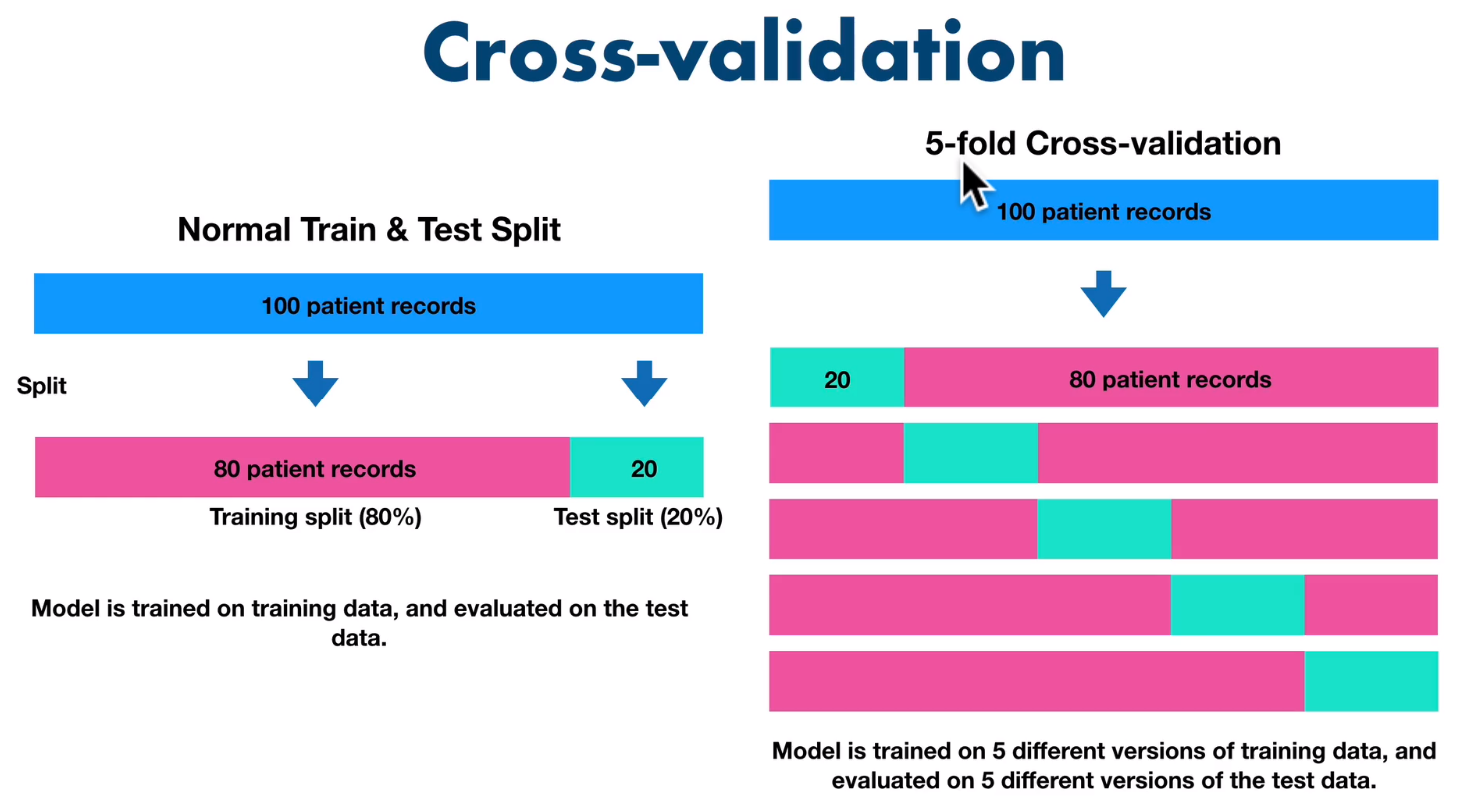

we can take the average of all of the scores of each fold evaluation

In [91]:
np.random.seed(42)

clf_single_score = clf.score(Xtest,ytest)

clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [92]:
# scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

default scoring of classififer = mean accuracy

### 4.2.1 classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cvs = cross_val_score(clf,X,y,cv=5)

In [94]:
np.mean(cvs)

0.8248087431693989

In [95]:
print(f"Cross validation score on 5 fold validation: {np.mean(cvs)*100:.2f}%")

Cross validation score on 5 fold validation: 82.48%


**Area uder the receiver operating characterisitic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

Roc curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* true posititve = model predicts a 1 when truth is 1
* false posiitve = model predict a 1 when truth is 0
* true negative = model predict 0 when truth is 0
* false negative = model predict a 0 when truth is 1

In [96]:
from sklearn.metrics import roc_curve

#create Xtest
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

#make the model
clf.fit(Xtrain,ytrain)

#make predictions with probabilities
y_probs = clf.predict_proba(Xtest)
y_probs[:5]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57]])

In [97]:
y_probs_positive = y_probs[:,1]
y_probs_negative = y_probs[:,0]

In [98]:
fpr,tpr,thresholds = roc_curve(ytest,y_probs_positive)

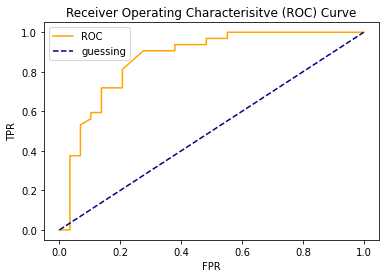

In [99]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    plots a ROC curve given a false positive rate(fpr) and true posiitve rate(tpr)
    of a model
    '''
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characterisitve (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest,y_probs_positive)

0.8669181034482759

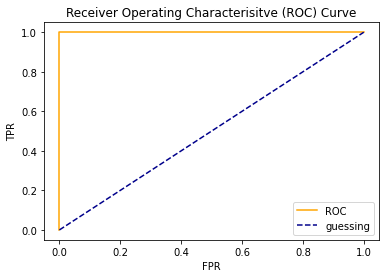

In [101]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(ytest,ytest)
plot_roc_curve(fpr,tpr)

# this is the ideal perfect model

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels the model predicts and the actual labels it was supposed to predict

In essence, it gives u an idea of where the model is getting confused/getting the wrong answer

In [102]:
from sklearn.metrics import confusion_matrix

ypreds = clf.predict(Xtest)

confusion_matrix(ytest,ypreds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [103]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(ytest,ypreds,
           rownames=["Actual Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


In [104]:
19+5+8+29

61

In [105]:
ypreds.shape

(61,)

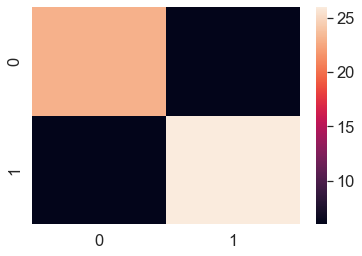

In [106]:
# make our confusion matrix more visual with seaborn's heatmap()

import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(ytest,ypreds)


sns.heatmap(conf_mat);

### creating a confusion matrix using scikit-learn

To use the new methods of creating a confusion matrix with scikit-learn you will need sklearn version 1.0+

In [107]:
import sklearn
sklearn.__version__

'1.0.2'

In [108]:
clf

RandomForestClassifier()

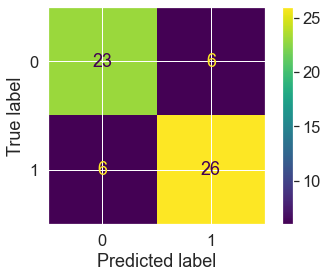

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=Xtest,y=ytest)

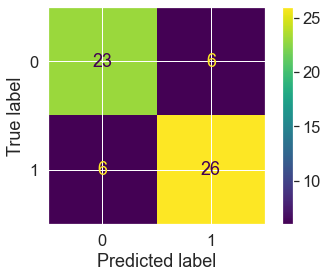

In [110]:
ConfusionMatrixDisplay.from_predictions(ytest,
                                       ypreds)

**Classification report**

In [111]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [112]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

- **Accuracy** is a good measure to start with if all classes are balanced (same amount of samples per class)
- **Precision** and **recall** become more important when classes are imbalanced
- if false positive predictions are worse than false negatives, aim for higher precision
- if false negative predictions are worse than false positive, im for higher recall.
- **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

model evaluation metrics on scikit learn website:https://scikit-learn.org/stable/modules/model_evaluation.html

We are going to cover:
1. $R^{2}$ or coeffiecient of determination
2. MAE
3. MSE

In [113]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(Xtrain,ytrain)

RandomForestRegressor()

In [114]:
model.score(Xtest,ytest)

0.8065734772187598

In [115]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [116]:
from sklearn.metrics import r2_score

# fill out an array with y_test mean
y_test_mean = np.full(len(ytest),ytest.mean())
y_test_mean[:5]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [117]:
r2_score(ytest,y_test_mean)

0.0

In [118]:
r2_score(ytest,model.predict(Xtest))

0.8065734772187598

In [119]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,model.predict(Xtest))

0.32659871732073664

In [120]:
preds = model.predict(Xtest)
df = pd.DataFrame(data={"actual":ytest,
                 "predicted":preds})
df["difference"] = df["predicted"]-df["actual"]
df.head(5)

,actual,predicted,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [121]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,preds)
mse

0.2534678520824551

### 4.2.3 Finally using the scoring parameter

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]


clf = RandomForestClassifier(n_estimators=100)

In [123]:
np.random.seed(42)

# cross validation accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)

In [124]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [125]:
# cross validation accuracy
print(f"the cross validated accuracy: {np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy: 82.48%


In [126]:
# precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [127]:
# cross validated precision
print(f"the cross validated precision: {np.mean(cv_precision):.2f}")

the cross validated precision: 0.83


In [128]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [129]:
print(f"the cross validated recall: {np.mean(cv_recall):.2f}")

the cross validated recall: 0.85


Lets check scoring metrics for our regession problem

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators = 100)

np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None) # the default scoring is R^2
np.mean(cv_r2)


0.6545458023124507

In [131]:
cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48474651661821716

## 4.3 Using different evaluation metrics as scikit learn functions

The 3rd way to evaluate scikit learn machine learning models is to use sklearn.metrics

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# create train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

# create model
clf = RandomForestClassifier(n_estimators=100)

# fit the model
clf.fit(Xtrain,ytrain)

# make predictions
preds = clf.predict(Xtest)

# evaluate the model using evaluation functions
accuracy_score(ytest,preds), precision_score(ytest,preds), recall_score(ytest,preds), f1_score(ytest,preds)

(0.8360655737704918, 0.8235294117647058, 0.875, 0.8484848484848485)

In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# create X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# create train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

# create model
model = RandomForestRegressor(n_estimators=100)

# fit the model
model.fit(Xtrain,ytrain)

# make predictions
preds = model.predict(Xtest)

# evaluate the model using evaluation functions
r2_score(ytest,preds), mean_absolute_error(ytest,preds), mean_squared_error(ytest,preds)

(0.8085430065851937, 0.32945188880813975, 0.2616674188687518)

## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameter = models find these patterns in data
* Hyperparameters = seetings on a model you can adjust to (potentially) improve its ability to find pattern

3 Ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [134]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

In [135]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation, and test

In [136]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [137]:
def evaluate_preds(ytrue,ypreds):
    '''
    performs evaluation comparison on ytrue labels vs ypred labels on a classification model
    '''
    accuracy = accuracy_score(ytrue,ypreds)
    precision = precision_score(ytrue,ypreds)
    recall = recall_score(ytrue,ypreds)
    f1 = f1_score(ytrue,ypreds)
    metric_dict = {"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1 score: {f1*100:.2f}%")
    
    return metric_dict

In [138]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffle = heart_disease.sample(frac=1)

# split into X and y
X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# split the data into train, val, test sets
train_split = round(0.7*len(heart_disease_shuffle))
valid_split = round(train_split+0.15*len(heart_disease_shuffle))

Xtrain,ytrain = X[:train_split],y[:train_split]
Xvalid,yvalid = X[train_split:valid_split],y[train_split:valid_split]
Xtest,ytest = X[valid_split:],y[valid_split:]

len(Xtrain),len(Xvalid),len(Xtest)

(212, 45, 46)

In [139]:
# create our model
clf = RandomForestClassifier()

# fit the model
clf.fit(Xtrain,ytrain)
 
# make baseline predictions
y_preds = clf.predict(Xvalid)

# evaluate the classififier on validation set
baseline_metrics = evaluate_preds(yvalid,y_preds)

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 score: 84.62%


In [140]:
np.random.seed(42)

# create a 2nd classififier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 200)

# fit the 2nd model
clf_2.fit(Xtrain,ytrain)

# make predictions with 2nd model
y_preds_2 = clf_2.predict(Xvalid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(yvalid,y_preds_2)

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 score: 84.62%


In [141]:
np.random.seed(42)

# create a 3rd classifier with different hyperparameter
clf_3 = RandomForestClassifier(max_depth=10)

# fit the 2nd model
clf_3.fit(Xtrain,ytrain)

# make predictions with 2nd model
y_preds_3 = clf_3.predict(Xvalid)

# evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(yvalid,y_preds_3)

Acc: 80.00%
Precision: 80.77%
Recall: 84.00%
F1 score: 82.35%


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [142]:
from sklearn.model_selection import RandomizedSearchCV

#RandomizedSearchCV()

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }

np.random.seed(42)

# split into X and y
X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# split into train and test sets
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

# create the model
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

# fit the RandomizedSearchCV version on clf
rs_clf.fit(Xtrain,ytrain);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [143]:
# obtain the best hyperparameters from the grid
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [144]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(Xtest)

# evaluate the predictions
rs_metrics = evaluate_preds(ytest,rs_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 score: 81.36%


### 5.3 Hyperparameter turning with GridSearchCV

In [145]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [146]:
6*5*2*3*3*5 #number of combinations with the 5 fold cross validation

2700

In [147]:
# obtain the best hyperparameters from the grid
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [148]:
# from the best parameters we can tune each hyperparameter within the range of the best.
# aka if best grid had 200 n_estimators we can set the n_estimators grid to be near 200
grid_2 = {'n_estimators': [100 , 200, 500],
          'max_depth': [None],
          'max_features': ['auto','sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1,2,3]}

In [149]:
#new number of combinations with 5 fold cross val
3*1*2*1*3*5

90

In [159]:
from sklearn.model_selection import GridSearchCV, train_test_split

#RandomizedSearchCV()

np.random.seed(42)

# split into X and y
X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# split into train and test sets
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

# create the model
#clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
#gs_clf = GridSearchCV(estimator=clf,
#                      param_grid=grid_2,
#                      cv=5,
#                      verbose=1)

# fit the RandomizedSearchCV version on clf
#gs_clf.fit(Xtrain,ytrain);

In [151]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [152]:
gs_y_preds = gs_clf.predict(Xtest)

#evaluate the predictions
gs_metrics = evaluate_preds(ytest,gs_y_preds)

Acc: 80.33%
Precision: 75.00%
Recall: 85.71%
F1 score: 80.00%


lets compare our models metrics

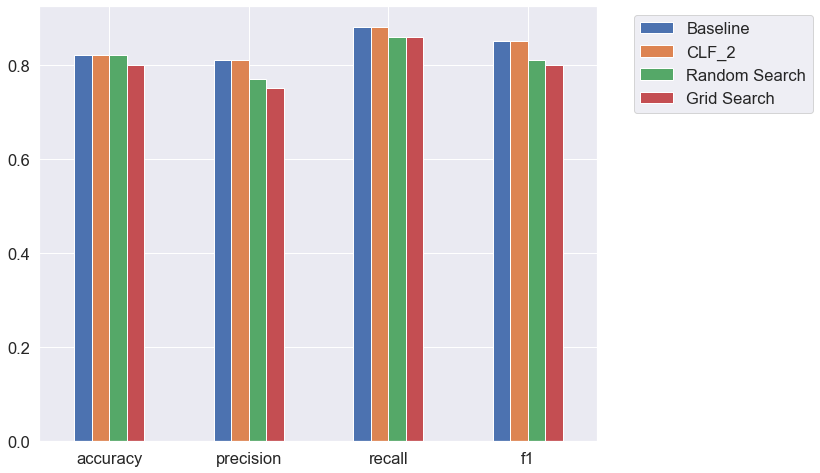

In [153]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2":clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));
plt.legend(['Baseline','CLF_2','Random Search','Grid Search'], bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xticks(rotation=0);

## 6. Saving and loading trained machine learning models

2 ways to save and load machine learning models:
1. With Python's pickle module
2. With the joblib module

**Pickle**

In [157]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl","wb"))

In [158]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [161]:
# make some predictions to check loaded model and saved model are the same

pickle_y_preds = loaded_pickle_model.predict(Xtest)
evaluate_preds(ytest,pickle_y_preds)

Acc: 80.33%
Precision: 75.00%
Recall: 85.71%
F1 score: 80.00%


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [162]:
gs_metrics

{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

They are the same metrics comparing the saved model to the actual model

**Joblib**

In [163]:
from joblib import dump,load

# save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [164]:
# import a saved joblib mode
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [165]:
# make and evaluate joblib prediction
joblib_y_preds = loaded_joblib_model.predict(Xtest)
evaluate_preds(ytest,joblib_y_preds)

Acc: 80.33%
Precision: 75.00%
Recall: 85.71%
F1 score: 80.00%


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

## 7. Putting it all together!

In [167]:
data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [168]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [169]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [174]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[("cat",categorical_transformer,categorical_features),
                                               ("door",door_transformer,door_feature),
                                               ("num",numeric_transformer,numeric_features)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

# fit and score the data
model.fit(Xtrain,ytrain)

model.score(Xtest,ytest)

0.22188417408787875

Its also possible possible to use GridSearchCV or RandomizedSearchCV with our pipeline

In [176]:
# use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(Xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [178]:
gs_model.score(Xtest,ytest)

0.3339554263158365